<a href="https://colab.research.google.com/github/manouarn/Plant-diseases-binnary-classification/blob/main/Plan_diseases_binary_classfication_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip drive/"My Drive"/PalmDateV2.zip

Archive:  drive/My Drive/PalmDateV2.zip
   creating: PalmDateV2/
   creating: PalmDateV2/train/
   creating: PalmDateV2/train/brownspots/
  inflating: PalmDateV2/train/brownspots/brownspots-88.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-89.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-9.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-90.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-91.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-92.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-93.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-94.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-95.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-96.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-97.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-98.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-99.jpg  
  inflating: PalmDateV2/train/brownspots/brownspots-1.jpg  
  inflatin

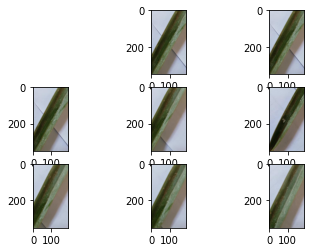

In [5]:
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'PalmDateV2/train/healthy/'
# plot first few images
for i in range(1,9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'healthy-' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

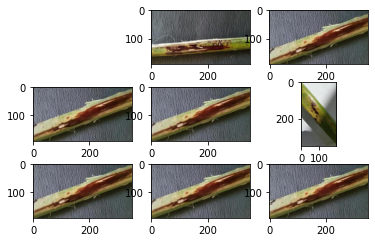

In [6]:

from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'PalmDateV2/train/brownspots/'
# plot first few images
for i in range(1,9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'brownspots-' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [9]:
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
# define location of dataset
folder = 'PalmDateV2/train/healthy/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('healthy'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(200, 200))
	# convert to numpy array
	photo = img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('healthys.npy', photos)
save('healthy.npy', labels)

(999, 200, 200, 3) (999,)


In [10]:
# load and confirm the shape
from numpy import load
photos = load('healthys.npy')
labels = load('healthys.npy')
print(photos.shape, labels.shape)

(999, 200, 200, 3) (999, 200, 200, 3)


In [11]:
import os
from os import listdir
dataset_home = 'PalmDateV2/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['healthy/','brownspots/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

In [12]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [13]:
import sys
from keras.models import Sequential
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [14]:
# define model
model = define_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [15]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [16]:
train_it = datagen.flow_from_directory('PalmDateV2/train/',
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('PalmDateV2/test/',
	class_mode='binary', batch_size=64, target_size=(200, 200))

Found 1398 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [17]:
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
	validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


In [18]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


> 84.727


In [22]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	

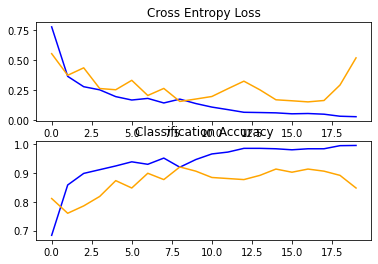

In [23]:
summarize_diagnostics(history)